# Exploratory Data Analysis (EDA): 

 Is a crucial initial step in the data analysis process. It involves examining and visualizing the dataset to understand its structure, patterns, and relationships between variables 
 
 our focus will be on applying EDA techniques to a titanic dataset.By exploring  dataset, we aim to gain insights into the factors that influence survival rates. Through the use of EDA techniques, such as summary statistics and visualizations, we hope to uncover valuable information that can contribute to our understanding .
 

In [496]:
#importing libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix

In [497]:
#loading data
train=pd.read_csv('D:\\Titanic\\train.csv')
test=pd.read_csv('D:\\Titanic\\test.csv')
combine = [train, test]

Dataset Columns Summary:

1. PassengerId 
2. pclass: 1 = 1st (the most expensive one), 2 = 2nd, 3 = 3rd
3. sex: male, female
4. Age: age of passenger
5. sibsp: # of siblings/spouses aboard
6. parch: % of parents/children aboard
7. ticket: ticket id number
8. fare: price paid
9. cabin: cabin assignment (not every passenger had one)
10. embarked: C = Cherbourg, Q = Queenstown, S = Southampton

# Insights from the Dataset
 After importing the dataset, our first step is to check if the data is imported properly, we can use
>   **head( )** to display the top 5 observations of the dataset

> Similar to ***head( )***, we can use ***tail( )***,  If we want to display the last 5 , all we need to do is to mention the number in brackets.

>  ***df.shape*** to check the number of observations (rows) and features (columns) in the dataset

>To understand more about the data, including the number of non-null records in each columns, their data types, the memory usage of the dataset, we use ***info( )***

> To find the number of unique values corresponding to each column in the DataFrame, we use ***nunique( )***

In [498]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [499]:
train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


Dataset Columns Summary:

* PassengerId
* pclass: 1 = 1st (the most expensive one), 2 = 2nd, 3 = 3rd
* sex: male, female
* Age: age of passenger
* sibsp: # of siblings/spouses aboard
* parch: % of parents/children aboard
* ticket: ticket id number
* fare: price paid
* cabin: cabin assignment (not every passenger had one)
* embarked: C = Cherbourg, Q = Queenstown, S = Southampton

In [500]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [501]:
print(train.shape,test.shape,combine[0].shape,combine[1].shape)

(891, 12) (418, 11) (891, 12) (418, 11)


> The dataset comprises diverse features, each falling into distinct data types. Categorical features, such as :'Name','Sex','Ticket','Cabin','Embarked' are represented as object(string).

>Integer data types (int64) are assigned to 'PassengerId','Pclass','Age','SibSp','Parch','Fare','Survived'.

> In the presence of missing values, Age column has 86 missing vlaues and cabin has 327 missing value.
 Proper handling of missing values is crucial for maintaining the dataset’s integrity during subsequent  data analysis or modeling processes.
 
 

In [502]:
for column in train.columns:
    num_unique_values = train[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')


Number of unique values in PassengerId: 891
Number of unique values in Survived: 2
Number of unique values in Pclass: 3
Number of unique values in Name: 891
Number of unique values in Sex: 2
Number of unique values in Age: 88
Number of unique values in SibSp: 7
Number of unique values in Parch: 7
Number of unique values in Ticket: 681
Number of unique values in Fare: 248
Number of unique values in Cabin: 147
Number of unique values in Embarked: 3


In [503]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


# Data Cleaning
Your data can have different sorts of quality issues. Therefore, it is essential that you clean your data. You do not want your data to be messy just like your room is nor do you want the values tampering with your data analysis , resulting in inaccuracies or inappropriate results. As a result, these issues must be addressed before data can be analyzed. There are many different data cleaning techniques, some of which are discussed below:

# 1. Handling Missing Values

Next step is to check for missing values in the dataset. It is very common for a dataset to have missing values. These missing values are represented by Noneor NaNvalues and are not supported by most machine learning algorithms.

There are three main types of missing data:

* Missing completely at random 
* Missing at random 
* Not missing at random 

We will use the ***isnull()*** function to get an idea of the amount of missing values in our dataset.

In [504]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [505]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

This shows that there are missing values in the dataset, 177 exhibited by ‘Age’ ,2 by 'Embarked' and 687 by ‘Cabin’ .

**Inorder to find the percentage of missing values in the dataset, we use:**

In [506]:
missing_percentage = train.isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           19.87
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin         77.10
Embarked       0.22
dtype: float64


In [507]:
train.drop('PassengerId', axis=1, inplace=True)

# Visualising the missing values

It goes without doubt that we need to have a good understanding of how the NaN values are distributed in our dataset. **Missingno** library offers an efficient to visualize the distribution of NaN values. It is a Python library and compatible with Pandas.

In [508]:
#pip install missingno

<AxesSubplot:>

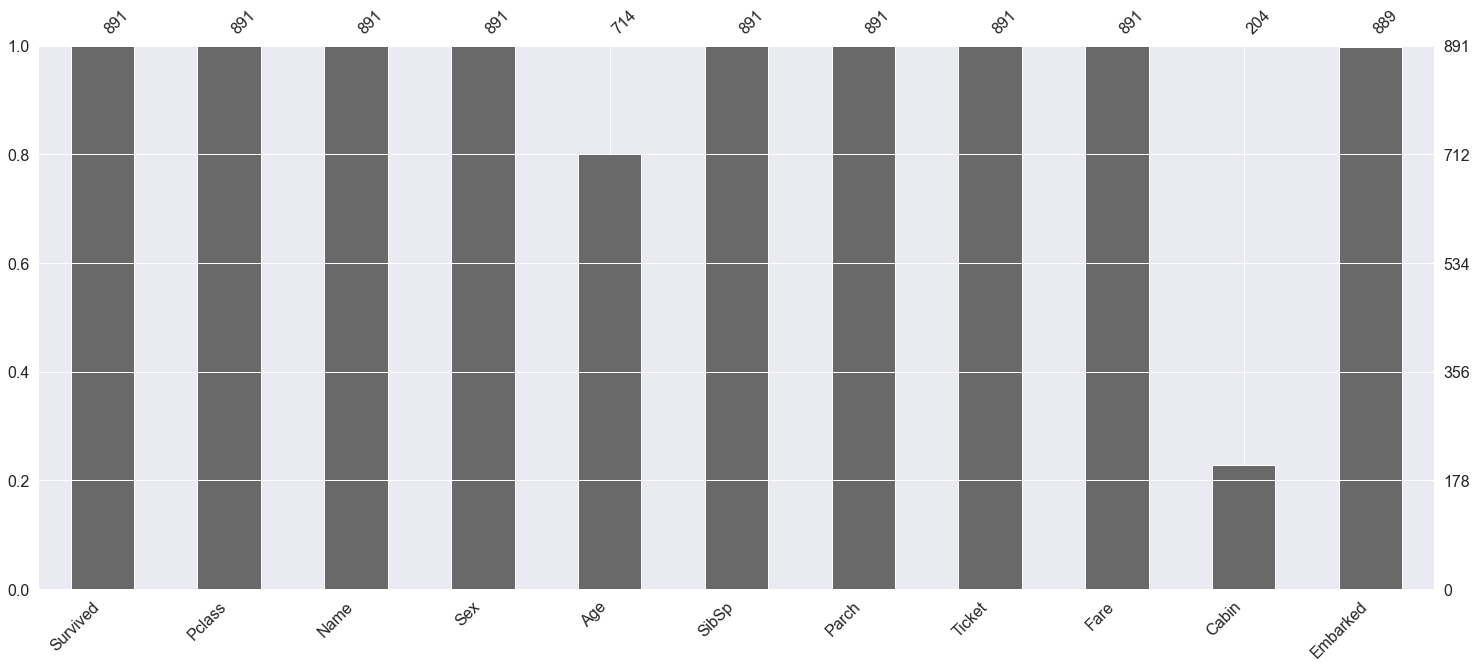

In [509]:
import pandas as pd
import missingno as msno
msno.bar(train)

# 2. Removing Irrelevant Features

Certain features can be removed from the dataset if they do no provide any value to the analysis

For instance, the ‘PassengerId’ column in our dataset , assuming it does’nt have any predictive power to predict the dependent variable, can be dropped.

In [510]:

columns_to_drop = [ 'Ticket', 'Cabin']


for dataset in combine:
    for column in columns_to_drop:
        dataset.drop(column, axis=1, inplace=True)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.25,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.28,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.92,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.10,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.05,S


In [511]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,7.83,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,7.00,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,9.69,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,8.66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,12.29,S


# Missing Value Imputation

One possible way to to get rid of  missing value in data.

**Several methods can be employed to handle missing values within these features.**

> **Arbitrary Value Imputation**: If there’s a specific assumption about missing values . they can be replaced with an educated guess using the fillna method.

> **Mean/Median/Mode Imputation**: Numeric features  can be imputed with their mean, median, or mode using the fillna method.

>**Most Frequent Value Imputation**: Categorical features can be imputed with their most frequent value using the fillna method.

>**Advanced Imputation Techniques**: Forward fill, backward fill, interpolation, or machine learning-based methods like KNNImputer can also be employed for more sophisticated imputation.

**So int Our Dataset:**

> **Imputation for ‘Age’ (Numerical Feature):**

In [512]:
# Impute missing values for the 'Age' column using mean
for dataset in combine:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

>**Imputation for ‘Embarked’ (Categorical Feature):**

In [513]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [514]:
#filling null in Fare with median
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

After performing these imputations, we can check the dataset for missing values again to ensure that all missing values  have been handled:

In [515]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 3.Removing Duplicate Rows

Handling duplicates is an essential step in data cleaning to ensure that the dataset is free from redundant information. Here’s how you can identify and remove duplicate rows or observations in a dataset:


In [516]:
train.duplicated().sum()

0

# Data Analysis

In [517]:
train.columns 

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [518]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

 > # processing on Survived

In [519]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [520]:
train.Survived=train.Survived.replace({0:'Non_survived',1:'Survived'})

<AxesSubplot:ylabel='None'>

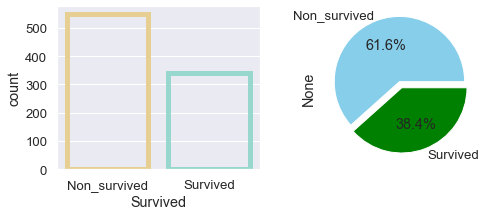

In [521]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))

# count plot on single categorical variable

custom_palette = [ 'skyblue', 'green']
sns.countplot(x ='Survived', data = train
              ,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("BrBG", 2),ax=ax1)

train.groupby('Survived').size().plot(kind='pie', autopct='%1.1f%%',colors=custom_palette,explode = [0.1,0],ax=ax2)

* Most People not Survived

> # processing on Pclass 

In [522]:
train.Pclass.value_counts().sort_values()

2    184
1    216
3    491
Name: Pclass, dtype: int64

<AxesSubplot:ylabel='None'>

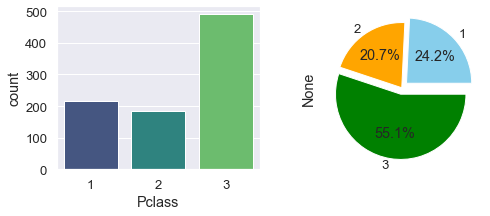

In [523]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))

sns.countplot(x='Pclass',data=train,color="salmon",palette='viridis',ax=ax1)

custom_palette = ['skyblue', 'orange','green']
train.groupby('Pclass').size().plot(kind='pie', autopct='%1.1f%%',colors=custom_palette,explode=[0.1,0,0.1],ax=ax2)

* Most people placed in 3rd class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

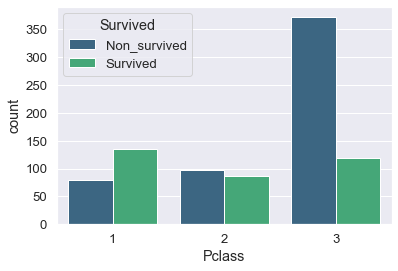

In [524]:
sns.countplot(x = 'Pclass', data = train, hue = "Survived",palette='viridis')

* The Chart confirms 1st class more likely survivied than other classes
* The Chart confirms 3rd class more likely dead than other classes

In [525]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1})
    


> #  Processing on Name (Feature Engineering)

* let us make Feature engineering on this column

In [526]:
for dataset in combine:
    dataset['Title']=np.nan

In [527]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,Non_survived,3,"Braund, Mr. Owen Harris",1,22.00,1,0,7.25,S,NaN
1,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,71.28,C,NaN
2,Survived,3,"Heikkinen, Miss. Laina",0,26.00,0,0,7.92,S,NaN
3,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,53.10,S,NaN
4,Non_survived,3,"Allen, Mr. William Henry",1,35.00,0,0,8.05,S,NaN


In [528]:
# Split the 'Name' column by comma and extract the second part

for dataset in combine:
    dataset['Title'] = dataset['Name'].str.split(',').str[1].str.strip().str.split(' ').str[0]
    dataset['Title'] = dataset['Title'].str.replace('.', '')
    

In [529]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,Non_survived,3,"Braund, Mr. Owen Harris",1,22.00,1,0,7.25,S,Mr
1,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,71.28,C,Mrs
2,Survived,3,"Heikkinen, Miss. Laina",0,26.00,0,0,7.92,S,Miss
3,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,53.10,S,Mrs
4,Non_survived,3,"Allen, Mr. William Henry",1,35.00,0,0,8.05,S,Mr
5,Non_survived,3,"Moran, Mr. James",1,29.70,0,0,8.46,Q,Mr
6,Non_survived,1,"McCarthy, Mr. Timothy J",1,54.00,0,0,51.86,S,Mr
7,Non_survived,3,"Palsson, Master. Gosta Leonard",1,2.00,3,1,21.07,S,Master
8,Survived,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00,0,2,11.13,S,Mrs
9,Survived,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00,1,0,30.07,C,Mrs


In [530]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
the           1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [531]:
# Replace specific titles with desired values

for dataset in combine:  
    dataset['Title'].replace(['Mrs', 'Master', 'Dr', 'Major', 'Capt', 'Sir', 'Miss', 'Mlle', 'Ms', 'Lady', 'Mme', 'Jonkheer', 'Don', 'Col', 'the', 'Rev'],
                       ['Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Miss', 'Miss', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'],
                       inplace=True)
    

In [532]:

for dataset in combine:
    dataset.drop(['Name'],axis=1,inplace=True)

In [533]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,Non_survived,3,1,22.00,1,0,7.25,S,Mr
1,Survived,1,0,38.00,1,0,71.28,C,Mrs
2,Survived,3,0,26.00,0,0,7.92,S,Miss
3,Survived,1,0,35.00,1,0,53.10,S,Mrs
4,Non_survived,3,1,35.00,0,0,8.05,S,Mr


In [534]:
train.Title.value_counts()

Mr       568
Miss     186
Mrs      125
Other     12
Name: Title, dtype: int64

<AxesSubplot:ylabel='None'>

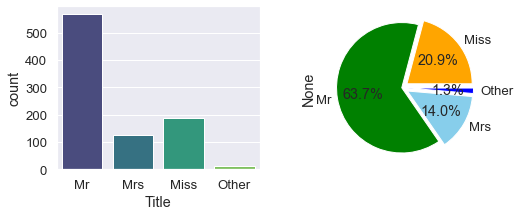

In [535]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))

sns.countplot(x='Title',data=train,color="salmon" ,palette='viridis',ax=ax1)

custom_palette = ['orange','green','skyblue','blue']

train.groupby('Title').size().plot(kind='pie', autopct='%1.1f%%',colors=custom_palette,explode=[0.1,0,0.1,0.1],ax=ax2)

* Most of them are Mr

> # Processing on Sex

In [536]:
train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='None'>

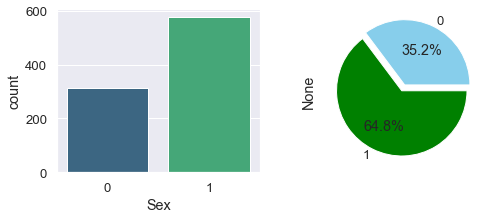

In [537]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
# count plot on single categorical variable
custom_palette = [ 'skyblue', 'green']
sns.countplot(x ='Sex', data = train,color="salmon",palette='viridis',ax=ax1)

train.groupby('Sex').size().plot(kind='pie', autopct='%1.1f%%',colors=custom_palette,explode = [0.1,0],ax=ax2)

* most of them are Male

<AxesSubplot:xlabel='Sex', ylabel='count'>

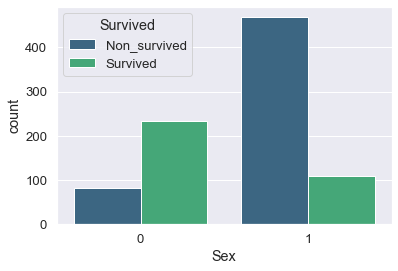

In [538]:
sns.countplot(x = 'Sex', data = train, hue = "Survived",palette='viridis')

 The Chart confirms Women more likely survivied than Men

> # Processing on Age

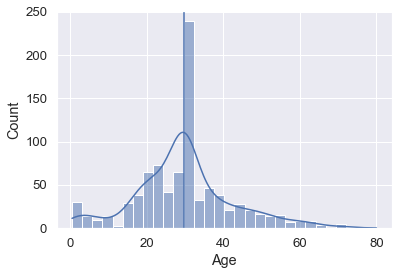

In [539]:
sns.histplot(data=train, x='Age', kde=True)
plt.axvline(train.Age.mean(), color = "b")

* we can find that most of them are between 30 and 35 year

<AxesSubplot:xlabel='Sex', ylabel='Age'>

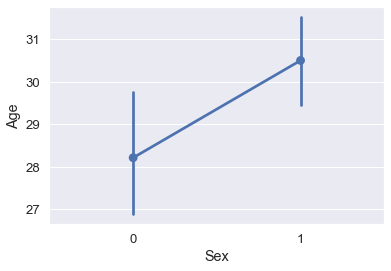

In [540]:
sns.pointplot(x = 'Sex', y = 'Age', data = train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

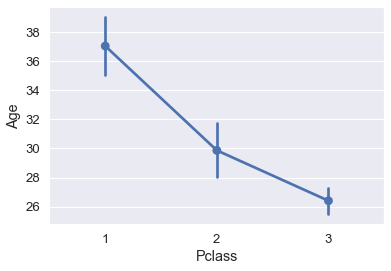

In [541]:
sns.pointplot(x = 'Pclass', y = 'Age', data = train)

<AxesSubplot:xlabel='Title', ylabel='Age'>

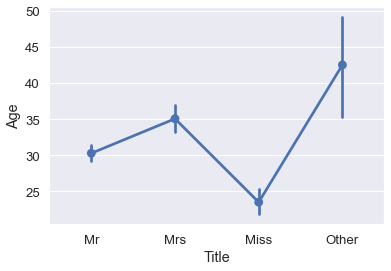

In [542]:
sns.pointplot(x = 'Title', y = 'Age', data = train)

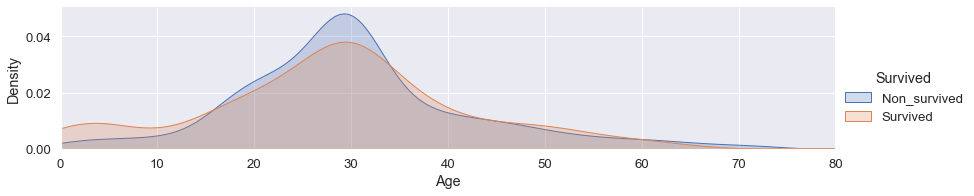

In [543]:
x = sns.FacetGrid(train, hue="Survived",aspect=4)
x.map(sns.kdeplot,'Age',shade= True)
x.set(xlim=(0, train['Age'].max()))
x.add_legend() 


(10.0, 50.0)

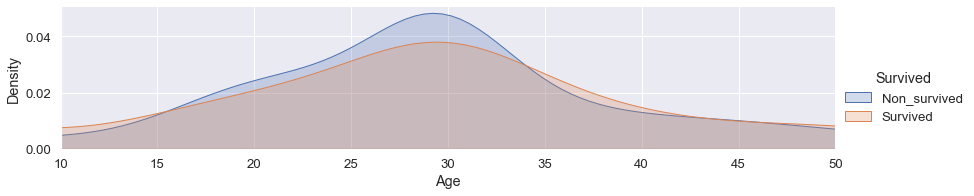

In [544]:
x = sns.FacetGrid(train, hue="Survived",aspect=4)
x.map(sns.kdeplot,'Age',shade= True)
x.set(xlim=(0, train['Age'].max()))
x.add_legend() 
plt.xlim(10,50)

* Those who were 25 to 35 years old were more Non Survived and  survived.

In [545]:

for dataset in combine:
    dataset["age_x"]=np.nan

In [546]:
bins = [0, 12, 21, 50, 80]
labels = ["Child", "Young", "Middle_aged", "Old"]

for dataset in combine:
    dataset['age_x'] = pd.cut(dataset['Age'], bins=bins, labels=labels)


In [547]:
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,age_x
0,Non_survived,3,1,22.00,1,0,7.25,S,Mr,Middle_aged
1,Survived,1,0,38.00,1,0,71.28,C,Mrs,Middle_aged
2,Survived,3,0,26.00,0,0,7.92,S,Miss,Middle_aged
3,Survived,1,0,35.00,1,0,53.10,S,Mrs,Middle_aged
4,Non_survived,3,1,35.00,0,0,8.05,S,Mr,Middle_aged
5,Non_survived,3,1,29.70,0,0,8.46,Q,Mr,Middle_aged
6,Non_survived,1,1,54.00,0,0,51.86,S,Mr,Old
7,Non_survived,3,1,2.00,3,1,21.07,S,Mr,Child
8,Survived,3,0,27.00,0,2,11.13,S,Mrs,Middle_aged
9,Survived,2,0,14.00,1,0,30.07,C,Mrs,Young


In [548]:
train["age_x"].value_counts()

Middle_aged    623
Young          135
Child           69
Old             64
Name: age_x, dtype: int64

<AxesSubplot:xlabel='age_x', ylabel='count'>

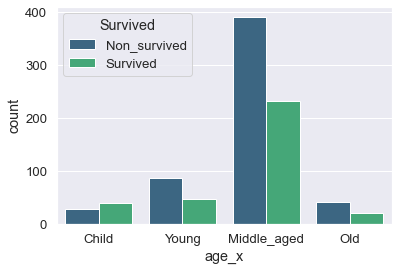

In [549]:
sns.countplot(x='age_x',data = train, hue = "Survived",palette='viridis')

*  range betweeen 21 and 50 has the most rank of survived and more survived

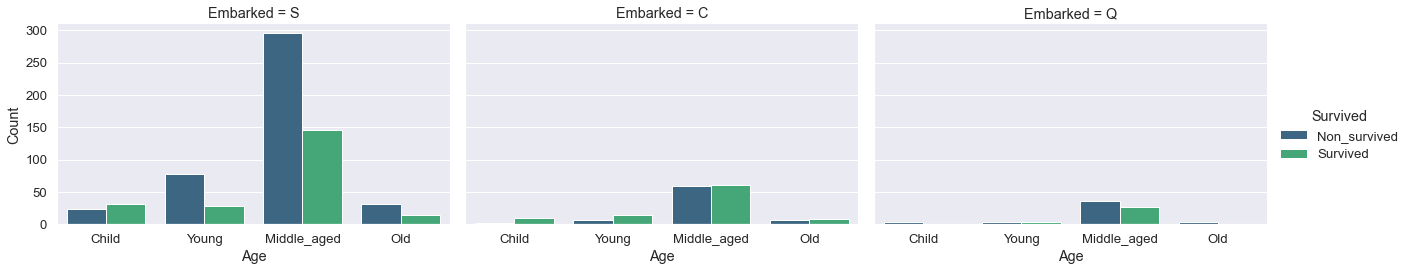

In [550]:
xy_graph=sns.catplot(x='age_x',col='Embarked',hue='Survived',kind = "count",data=train
                     ,palette='viridis',height=4, aspect=1.5)
# Customize other plot properties if needed
xy_graph.set_axis_labels("Age", "Count")
xy_graph.set_titles("Embarked = {col_name}")
plt.show()

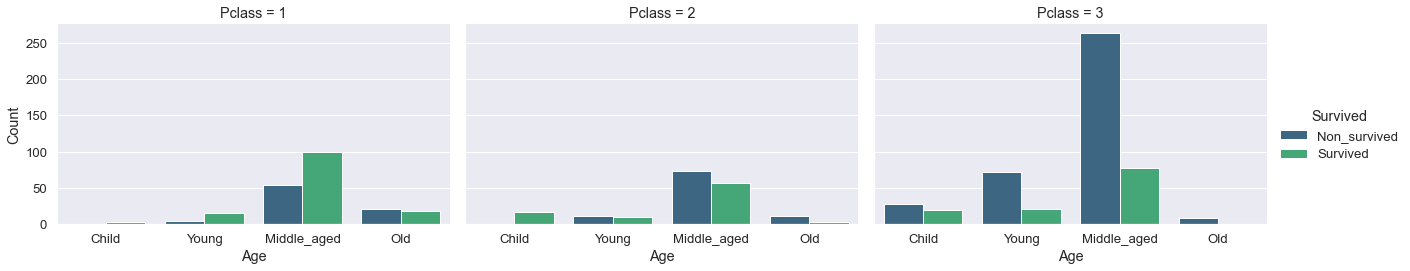

In [551]:
xy_graph=sns.catplot(x='age_x',col='Pclass',hue='Survived',kind = "count",data=train
                     ,palette='viridis',height=4, aspect=1.5)
# Customize other plot properties if needed
xy_graph.set_axis_labels("Age", "Count")
xy_graph.set_titles("Pclass = {col_name}")
plt.show()

> # Processing on Sibscp and Parch

In [552]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [553]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [554]:
#family size
for dataset in combine:
    dataset['Family Size'] = dataset['Parch'] + dataset['SibSp'] + 1

In [555]:
for dataset in combine:
    dataset['Alone'] = dataset['Family Size'].map(lambda c: 1 if c == 1 else 0)
    dataset['Not_Alone'] = dataset['Family Size'].map(lambda c: 1 if c > 1 else 0)

In [556]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,age_x,Family Size,Alone,Not_Alone
0,Non_survived,3,1,22.00,1,0,7.25,S,Mr,Middle_aged,2,0,1
1,Survived,1,0,38.00,1,0,71.28,C,Mrs,Middle_aged,2,0,1
2,Survived,3,0,26.00,0,0,7.92,S,Miss,Middle_aged,1,1,0
3,Survived,1,0,35.00,1,0,53.10,S,Mrs,Middle_aged,2,0,1
4,Non_survived,3,1,35.00,0,0,8.05,S,Mr,Middle_aged,1,1,0


In [557]:
for dataset in combine:
    dataset.drop(['Parch','SibSp'],axis=1,inplace=True)


In [558]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,age_x,Family Size,Alone,Not_Alone
0,Non_survived,3,1,22.00,7.25,S,Mr,Middle_aged,2,0,1
1,Survived,1,0,38.00,71.28,C,Mrs,Middle_aged,2,0,1
2,Survived,3,0,26.00,7.92,S,Miss,Middle_aged,1,1,0
3,Survived,1,0,35.00,53.10,S,Mrs,Middle_aged,2,0,1
4,Non_survived,3,1,35.00,8.05,S,Mr,Middle_aged,1,1,0


In [559]:
train.shape,test.shape

((891, 11), (418, 11))

> # porcessing on Fare

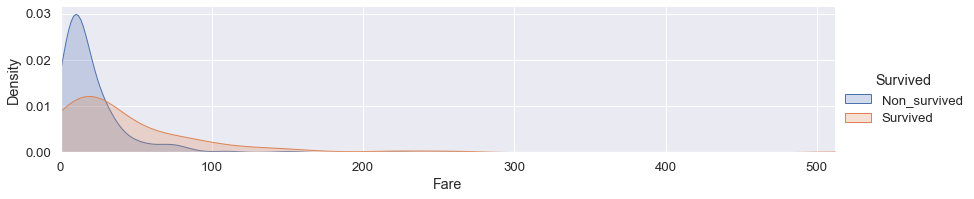

In [560]:
x = sns.FacetGrid(train, hue="Survived",aspect=4)
x.map(sns.kdeplot,'Fare',shade= True)
x.set(xlim=(0, train['Fare'].max()))
x.add_legend() 


(0.0, 40.0)

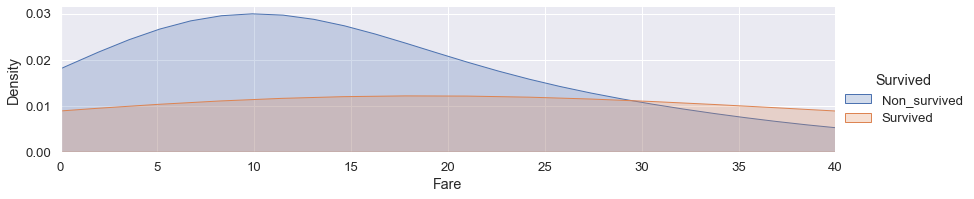

In [561]:
x = sns.FacetGrid(train, hue="Survived",aspect=4)
x.map(sns.kdeplot,'Fare',shade= True)
x.set(xlim=(0, train['Fare'].max()))
x.add_legend() 
plt.xlim(0,40)

> # Processing on Embarked

In [562]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [563]:
for dataset in combine:
    dataset.Embarked=dataset.Embarked.replace( {'C': 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})
    

<AxesSubplot:ylabel='None'>

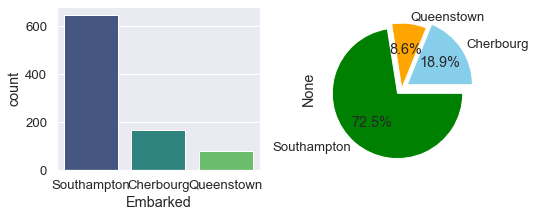

In [564]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))

sns.countplot(x='Embarked',data=train,color="salmon",palette='viridis',ax=ax1)
custom_palette = ['skyblue', 'orange','green']
train.groupby('Embarked').size().plot(kind='pie', autopct='%1.1f%%',colors=custom_palette,explode=[0.1,0,0.1],ax=ax2)

* Most of People embarks from  Southampton

<AxesSubplot:xlabel='Embarked', ylabel='count'>

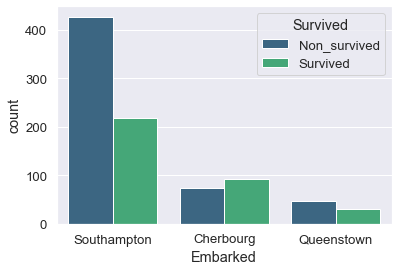

In [565]:
sns.countplot(x='Embarked',data = train, hue = "Survived",palette='viridis')

<AxesSubplot:>

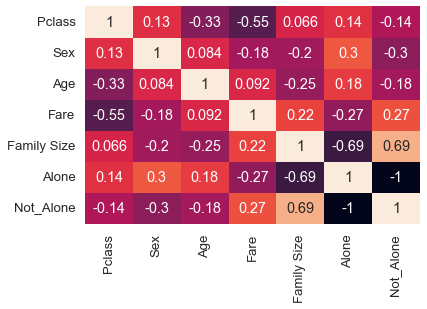

In [566]:
cor = train.corr()
sns.heatmap(cor, cbar = False, annot = True)

In [567]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'age_x', 'Family Size', 'Alone', 'Not_Alone'],
      dtype='object')

In [568]:
train.shape

(891, 11)

In [569]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'age_x', 'Family Size', 'Alone', 'Not_Alone'],
      dtype='object')

In [570]:
test.shape

(418, 11)

># LazyPredict

In [571]:
train.Survived=train.Survived.replace({'Non_survived':0,'Survived':1})

In [572]:
Y_train=train.loc[:]['Survived']
X_train=train.iloc[:,1:26]
X_test=test.copy()

In [574]:
print("Size of X_train:", len(X_train))
print("Size of Y_train:", len(Y_train))


Size of X_train: 891
Size of Y_train: 891


In [575]:
X_train, X_test, Y_train, y_test = train_test_split(X_train, Y_train,test_size=.33,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.96it/s]

[LightGBM] [Info] Number of positive: 231, number of negative: 365
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.387584 -> initscore=-0.457480
[LightGBM] [Info] Start training from score -0.457480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.85,0.83,0.83,0.85,0.11
NuSVC,0.85,0.83,0.83,0.85,0.03
SVC,0.85,0.83,0.83,0.85,0.05
AdaBoostClassifier,0.83,0.82,0.82,0.83,0.10
XGBClassifier,0.82,0.81,0.81,0.82,0.07
KNeighborsClassifier,0.82,0.81,0.81,0.82,0.03
LogisticRegression,0.81,0.80,0.80,0.81,0.02
RidgeClassifierCV,0.81,0.80,0.80,0.81,0.02
RidgeClassifier,0.81,0.80,0.80,0.81,0.03


In [576]:
best_model_name = models.iloc[0].name
best_model_name

'LGBMClassifier'

In [577]:
# best model
best_model = clf.models[best_model_name]
best_model.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 231, number of negative: 365
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.387584 -> initscore=-0.457480
[LightGBM] [Info] Start training from score -0.457480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Sex', 'Age', 'Fare', 'Family Size', 'Alone', 'Not_Alone'], dtype='object')),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',


In [578]:
y_pred = best_model.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0
 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1
 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1]


In [579]:
classes = np.array(['Survived', 'Died'])
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

accuracy:  0.847457627118644


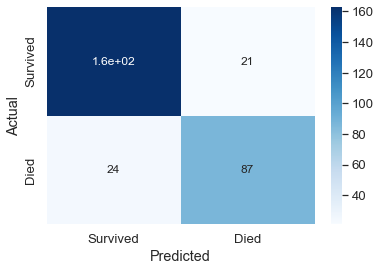

In [580]:
plt.figure()
sns.set(font_scale=1.2)
sns.heatmap(cm, cmap="Blues", annot_kws={"size": 12}, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))


In [581]:
default_value = 0

kaggle_predictions = pd.DataFrame({
    "PassengerId": test["PassengerId"].values,
    "Survived": np.concatenate([y_pred, [default_value] * (418 - len(y_pred))])
})

In [582]:
print(kaggle_predictions)

path="D:\\Titanic\\submission.csv"
kaggle_predictions.to_csv(path, index=False)


     PassengerId  Survived
0            892         1
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         0
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


># Esemble Model With Lazy 

In [601]:
nb_mod = 20
good_model_list = [models.iloc[i].name for i in range(nb_mod)]

print(good_model_list)

['LGBMClassifier', 'NuSVC', 'SVC', 'AdaBoostClassifier', 'XGBClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'RidgeClassifierCV', 'RidgeClassifier', 'LinearDiscriminantAnalysis', 'LinearSVC', 'CalibratedClassifierCV', 'LabelSpreading', 'NearestCentroid', 'ExtraTreesClassifier', 'BaggingClassifier', 'LabelPropagation', 'DecisionTreeClassifier', 'BernoulliNB', 'RandomForestClassifier']
